Training Set:
Dry Skin:


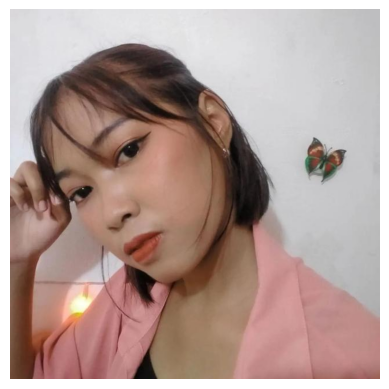


Normal Skin:


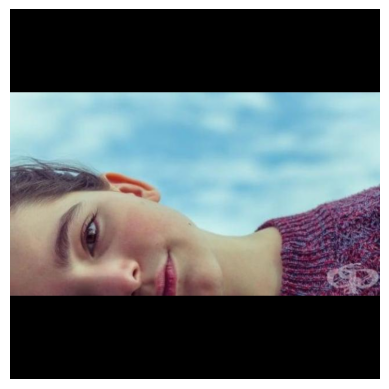


Oily Skin:


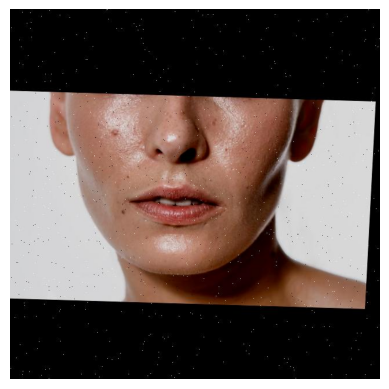


Testing Set:
Dry Skin:


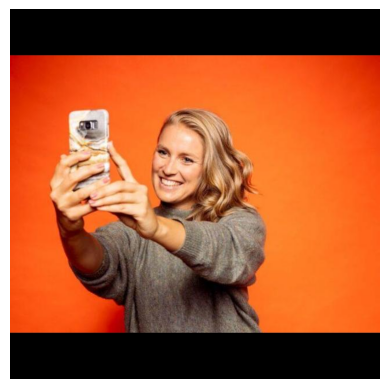


Normal Skin:


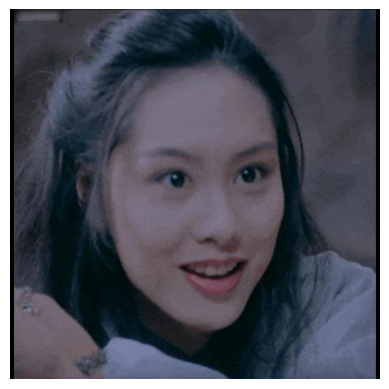


Oily Skin:


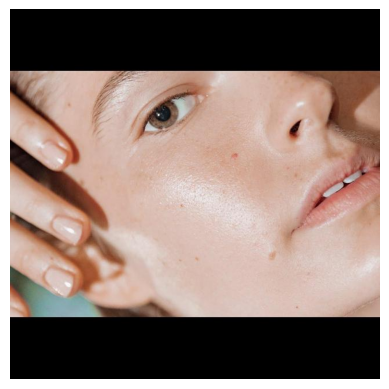


Validation Set:
Dry Skin:


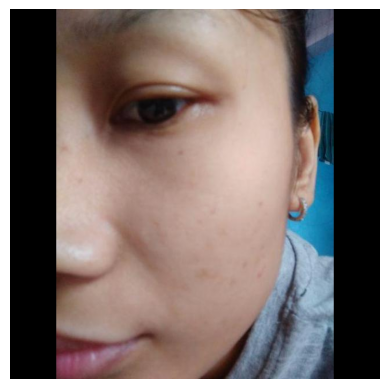


Normal Skin:


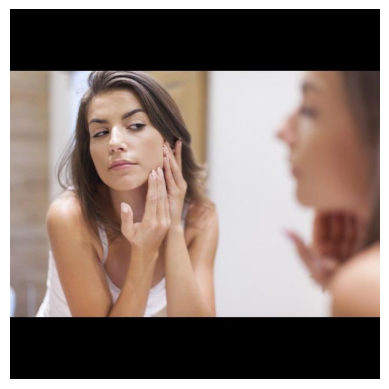


Oily Skin:


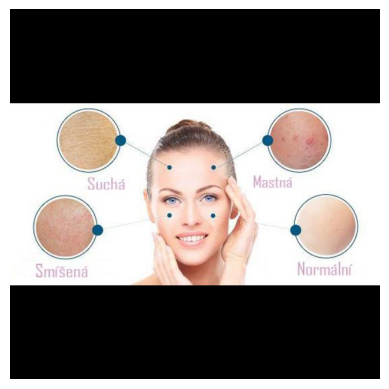

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# DATAPATH
base_path = '/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/'
train_dry = os.path.join(base_path, 'train/dry')
train_normal = os.path.join(base_path, 'train/normal')
train_oily = os.path.join(base_path, 'train/oily')

test_dry = os.path.join(base_path, 'test/dry')
test_normal = os.path.join(base_path, 'test/normal')
test_oily = os.path.join(base_path, 'test/oily')

valid_dry = os.path.join(base_path, 'valid/dry')
valid_normal = os.path.join(base_path, 'valid/normal')
valid_oily = os.path.join(base_path, 'valid/oily')

# THIS FUNCTION SHOW IMAGE FROM DIRECTORIES
def display_images(directory):
    sample_image_path = os.path.join(directory, os.listdir(directory)[0])

    # LOAD AND DISPLAY IMAGE 
    img = mpimg.imread(sample_image_path)
    plt.imshow(img)
    plt.axis('off')  
    plt.show()


print("Training Set:")
print("Dry Skin:")
display_images(train_dry)

print("\nNormal Skin:")
display_images(train_normal)

print("\nOily Skin:")
display_images(train_oily)


print("\nTesting Set:")
print("Dry Skin:")
display_images(test_dry)

print("\nNormal Skin:")
display_images(test_normal)

print("\nOily Skin:")
display_images(test_oily)


print("\nValidation Set:")
print("Dry Skin:")
display_images(valid_dry)

print("\nNormal Skin:")
display_images(valid_normal)

print("\nOily Skin:")
display_images(valid_oily)


In [11]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)

            # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)

            images.append(img)
            labels.append(label)

    return images, labels

# DATAPATH
base_path = '/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/'
train_dry = os.path.join(base_path, 'train/dry')
train_normal = os.path.join(base_path, 'train/normal')
train_oily = os.path.join(base_path, 'train/oily')

test_dry = os.path.join(base_path, 'test/dry')
test_normal = os.path.join(base_path, 'test/normal')
test_oily = os.path.join(base_path, 'test/oily')

valid_dry = os.path.join(base_path, 'valid/dry')
valid_normal = os.path.join(base_path, 'valid/normal')
valid_oily = os.path.join(base_path, 'valid/oily')

# LOAD AND PREPROCESS TRAIN DATA
print("Loading and Preprocessing Training Data:")
train_images = []
train_labels = []

# DRY SKIN
dry_images, dry_labels = load_and_preprocess_images(train_dry, label='dry')
train_images.extend(dry_images)
train_labels.extend(dry_labels)

# NORMAL SKIN
normal_images, normal_labels = load_and_preprocess_images(train_normal, label='normal')
train_images.extend(normal_images)
train_labels.extend(normal_labels)

# OILY SKIN
oily_images, oily_labels = load_and_preprocess_images(train_oily, label='oily')
train_images.extend(oily_images)
train_labels.extend(oily_labels)

# CONVERT TO NUMPY ARRAYS 
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# CONVERT LABEL TO NUMERIC FORMAT
label_encoder = LabelEncoder()
train_labels_numeric = label_encoder.fit_transform(train_labels)

# CONVERT LABEL TO ONE HOT ENCODING 
train_labels_one_hot = to_categorical(train_labels_numeric)

# NORMALIZE PIXEL VALUES
train_images_normalized = train_images / 255.0

# DATA AUGMENTATION
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# SPLIT THE DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(
    train_images_normalized, train_labels_one_hot, test_size=0.2, random_state=42
)


print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


2024-02-25 06:42:13.802698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 06:42:13.802963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 06:42:13.961650: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading and Preprocessing Training Data:
Training Data Shape: (2204, 128, 128)
Testing Data Shape: (552, 128, 128)
Training Labels Shape: (2204, 3)
Testing Labels Shape: (552, 3)


2024-02-25 07:01:18.809575: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 07:01:18.809732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 07:01:18.961944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading and Preprocessing Training Data:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_

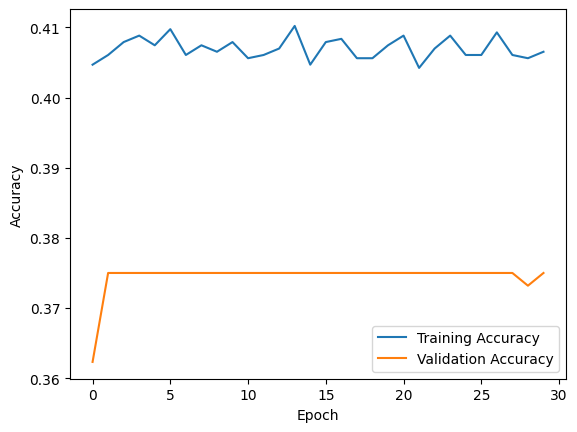

1/1 [==============================] - 0s 94ms/step


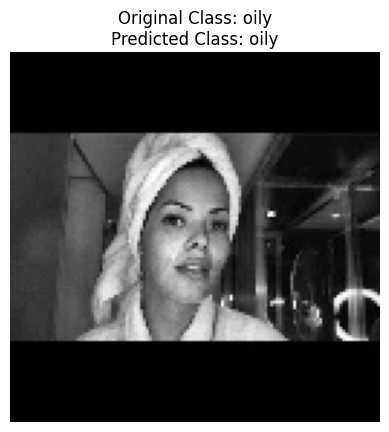

In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# FUNCTION TO LOAD AND PREPROCESS IMAGE
def load_and_preprocess_images(directory, label, image_size=(128, 128), clahe_clip_limit=2.0):
    images = []
    labels = []

    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, image_size)

            # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
            clahe = cv2.createCLAHE(clipLimit=clahe_clip_limit)
            img = clahe.apply(img)

            images.append(img)
            labels.append(label)

    return images, labels

# DATAPATH
base_path = '/kaggle/input/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/'
train_dry = os.path.join(base_path, 'train/dry')
train_normal = os.path.join(base_path, 'train/normal')
train_oily = os.path.join(base_path, 'train/oily')

test_dry = os.path.join(base_path, 'test/dry')
test_normal = os.path.join(base_path, 'test/normal')
test_oily = os.path.join(base_path, 'test/oily')

valid_dry = os.path.join(base_path, 'valid/dry')
valid_normal = os.path.join(base_path, 'valid/normal')
valid_oily = os.path.join(base_path, 'valid/oily')


print("Loading and Preprocessing Training Data:")
train_images = []
train_labels = []


dry_images, dry_labels = load_and_preprocess_images(train_dry, label='dry')
train_images.extend(dry_images)
train_labels.extend(dry_labels)

normal_images, normal_labels = load_and_preprocess_images(train_normal, label='normal')
train_images.extend(normal_images)
train_labels.extend(normal_labels)


oily_images, oily_labels = load_and_preprocess_images(train_oily, label='oily')
train_images.extend(oily_images)
train_labels.extend(oily_labels)


train_images = np.array(train_images)
train_labels = np.array(train_labels)


label_encoder = LabelEncoder()
train_labels_numeric = label_encoder.fit_transform(train_labels)


train_labels_one_hot = to_categorical(train_labels_numeric)


train_images_normalized = train_images / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(
    train_images_normalized, train_labels_one_hot, test_size=0.2, random_state=42
)



import tensorflow as tf
from tensorflow.keras import layers, models

# CNN MODEL 
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  #  3 CLASSES (dry, normal, oily)

# COMPILE THE MODEL 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# SHOW MODEL SUMMARY
model.summary()


# TRAIN THE MODEL WITH DATA AUGMENTATION
batch_size = 32
epochs = 30

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(X_train.reshape((-1, 128, 128, 1)), y_train, batch_size=batch_size)

history = model.fit(train_generator, 
                    steps_per_epoch=len(X_train)//batch_size, 
                    epochs=epochs, 
                    validation_data=(X_test.reshape((-1, 128, 128, 1)), y_test))


# PLOT TRAIN HISTORY
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# PREDICT SAMPLE IMAGE FROM TESTING SET
sample_index = 0
sample_image = X_test[sample_index].reshape((1, 128, 128, 1))
original_label = np.argmax(y_test[sample_index])
original_label_label = label_encoder.classes_[original_label]

predicted_probabilities = model.predict(sample_image)
predicted_class = np.argmax(predicted_probabilities)
predicted_class_label = label_encoder.classes_[predicted_class]

#SHOW THE ORGINAL LABEL AND PREDICTED LABEL   ALONG WITH THE CORRESPONDING IMAGE 
sample_image_reshaped = sample_image.reshape((128, 128))
plt.imshow(sample_image_reshaped, cmap='gray')
plt.title(f"Original Class: {original_label_label}\nPredicted Class: {predicted_class_label}")
plt.axis('off')
plt.show()